Performing classification of smokers and non-smokers using differnt types of kernels for SVM(support vector machines) algorithms like linear kernel,polynomial kernel,rbf kernel and finding the best kernel with highest accuracy.and also performing grid search(hyperparameter tuning) to improve the models's performance.

In [ ]:
import pandas as pd
df=pd.read_csv('/content/finaltraindata.csv')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/finaltraindata.csv')
print(df.head())
df = df.dropna()
df = df.drop_duplicates()

df.to_csv('preprocessed_dataset.csv', index=False)

   id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0   55         165          60       81.0             0.5   
1   1   70         165          65       89.0             0.6   
2   2   20         170          75       81.0             0.4   
3   3   35         180          95      105.0             1.5   
4   4   30         165          60       80.5             1.5   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  HDL  LDL  \
0              0.6              1               1       135  ...   40   75   
1              0.7              2               2       146  ...   57  126   
2              0.5              1               1       118  ...   45   93   
3              1.2              1               1       131  ...   38  102   
4              1.0              1               1       121  ...   44   93   

   hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  \
0        16.5              1               1.0   22   25   2

In [ ]:
import pandas as pd
import numpy as np
d=pd.read_csv('/content/preprocessed_dataset.csv')

In [ ]:
X = d.drop('smoking', axis=1)
y = d['smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear kernel svm


In [ ]:
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SVC(kernel='linear')
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(y_pred)


[1 1 1 ... 1 0 0]


Accuracy: 0.7541229385307346
classification report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1079
           1       0.72      0.77      0.74       922

    accuracy                           0.75      2001
   macro avg       0.75      0.76      0.75      2001
weighted avg       0.76      0.75      0.75      2001

confusion matrix


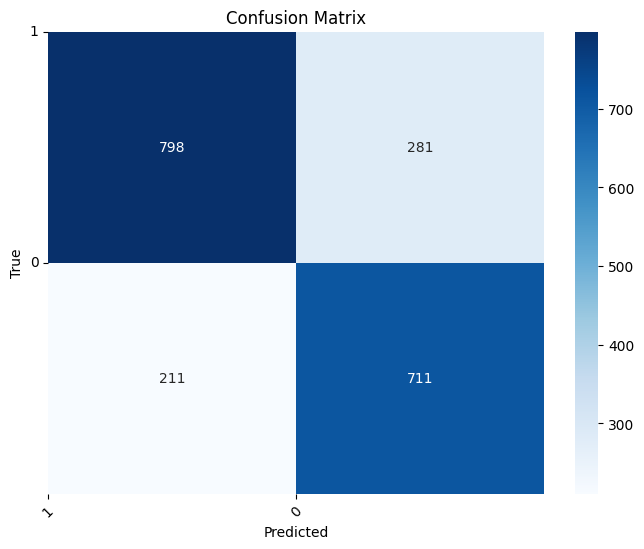

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('classification report:')
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

class_labels = df['smoking'].unique()
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45)
plt.yticks(ticks=range(len(class_labels)), labels=class_labels, rotation=0)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



polynomial kernel svm

In [ ]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svm_model_poly = SVC(kernel='poly', degree=3)

svm_model_poly.fit(X_train, y_train)


SVC(kernel='poly')

Accuracy with polynomial kernel: 0.5912043978010995


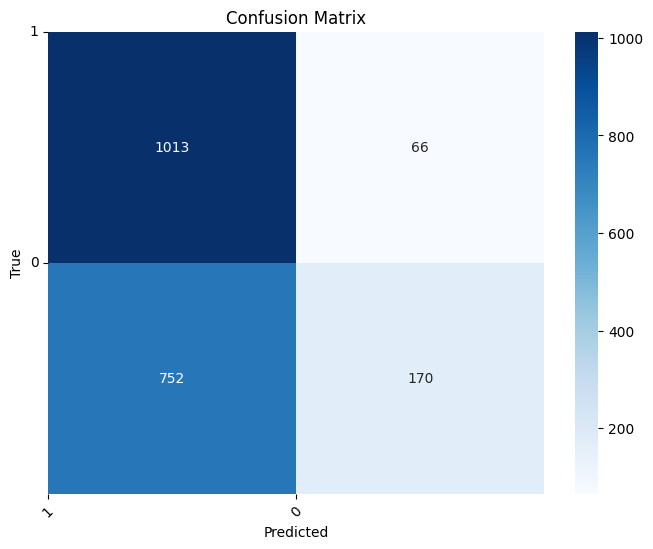

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix

y_pred_polys = svm_model_poly.predict(X_test)
accuracy_polys = accuracy_score(y_test, y_pred_polys)
print(f'Accuracy with polynomial kernel: {accuracy_polys}')

cm = confusion_matrix(y_test, y_pred_poly)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

class_labels = df['smoking'].unique()
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45)
plt.yticks(ticks=range(len(class_labels)), labels=class_labels, rotation=0)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


rbf kernel

In [ ]:
svm_model_rbf = SVC(kernel='rbf')

svm_model_rbf.fit(X_train, y_train)

y_pred_rbf = svm_model_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'Accuracy with RBF kernel: {accuracy_rbf}')


Accuracy with RBF kernel: 0.5632183908045977


Accuracy with RBF kernel: 0.5632183908045977


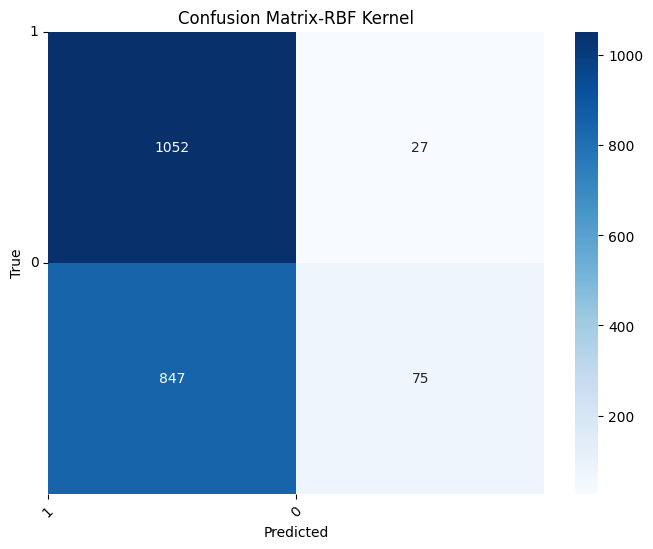

In [ ]:
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'Accuracy with RBF kernel: {accuracy_rbf}')

cm_rbf = confusion_matrix(y_test,y_pred_rbf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues')

class_labels = df['smoking'].unique()
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45)
plt.yticks(ticks=range(len(class_labels)), labels=class_labels, rotation=0)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix-RBF Kernel')
plt.show()


grid search(hyperparameter tuning)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10]}

svm_model_rbf = SVC(kernel='rbf')

grid_search = GridSearchCV(svm_model_rbf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy with Optimal Parameters: {accuracy_best}')

Best Parameters: {'C': 0.1, 'gamma': 0.01}
Accuracy with Optimal Parameters: 0.5392303848075962


Accuracy with Final Model: 0.5392303848075962
Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1079
           1       0.00      0.00      0.00       922

    accuracy                           0.54      2001
   macro avg       0.27      0.50      0.35      2001
weighted avg       0.29      0.54      0.38      2001



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


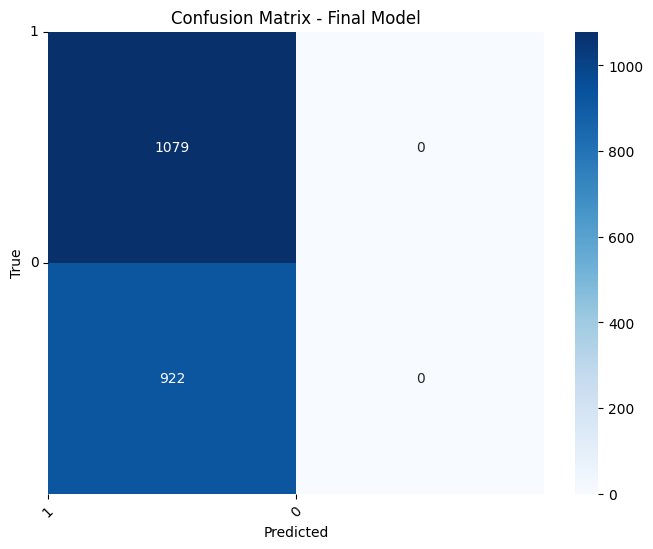

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

final_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

accuracy_final = accuracy_score(y_test, y_pred_final)
print(f'Accuracy with Final Model: {accuracy_final}')
print('Classification Report:')
print(classification_report(y_test, y_pred_final))

cm_final = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues')

class_labels = df['smoking'].unique()
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45)
plt.yticks(ticks=range(len(class_labels)), labels=class_labels, rotation=0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Final Model')
plt.show()

linear kernel performs better with highest accuracy
